In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'..\Data\Data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

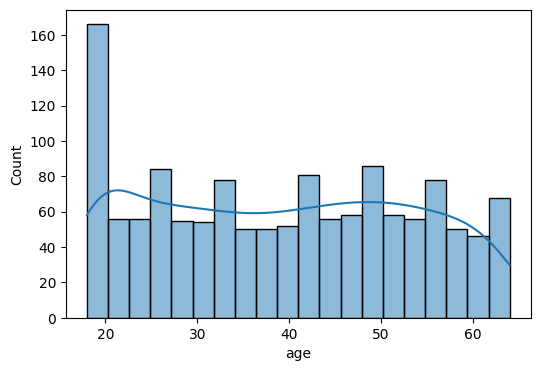

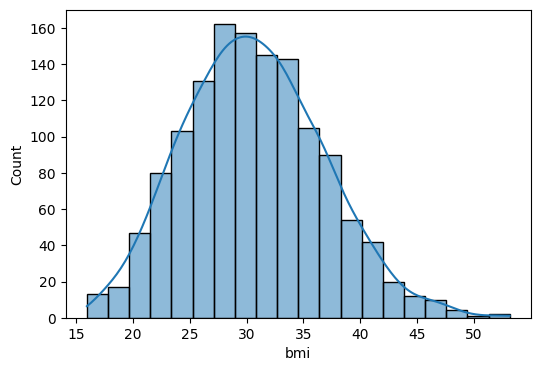

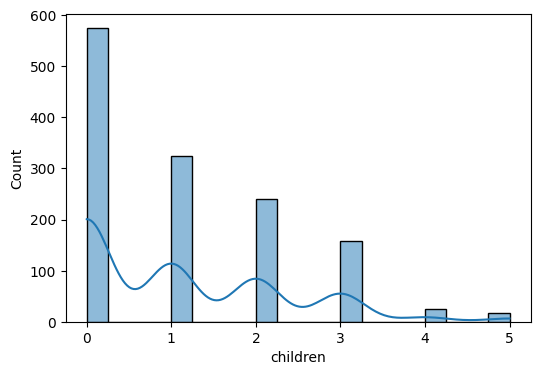

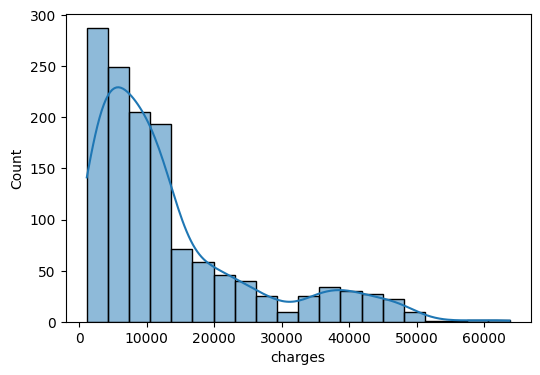

In [9]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.show()

<Axes: xlabel='children', ylabel='count'>

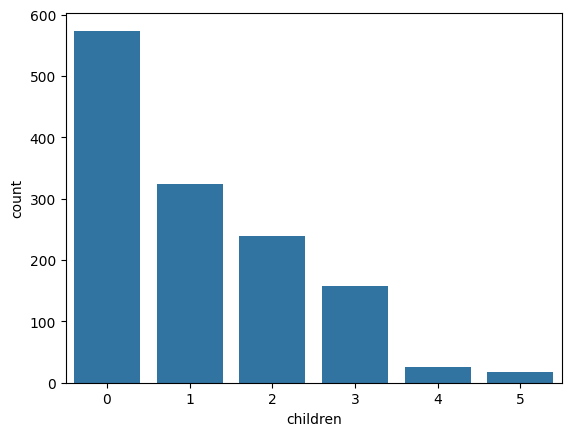

In [10]:
sns.countplot(x=df['children'])

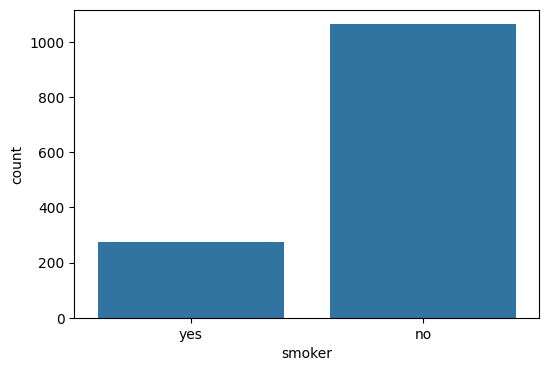

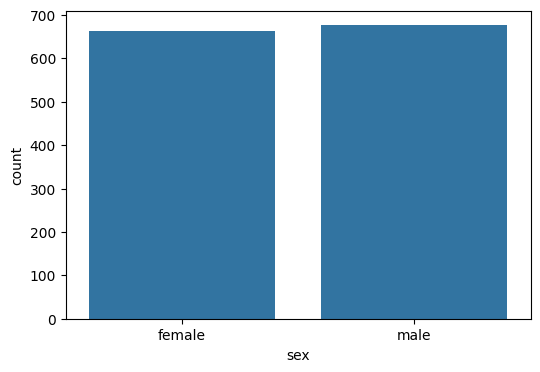

In [11]:
for col in ['smoker', 'sex']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x = df[col])

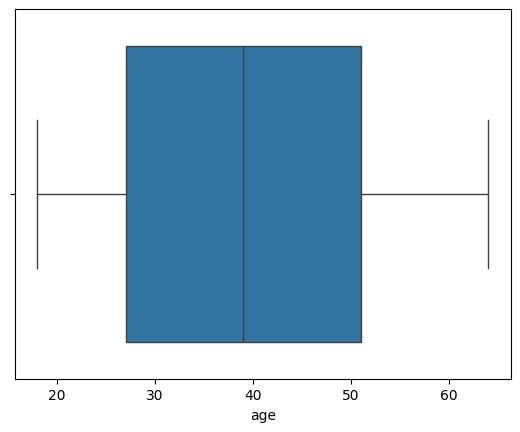

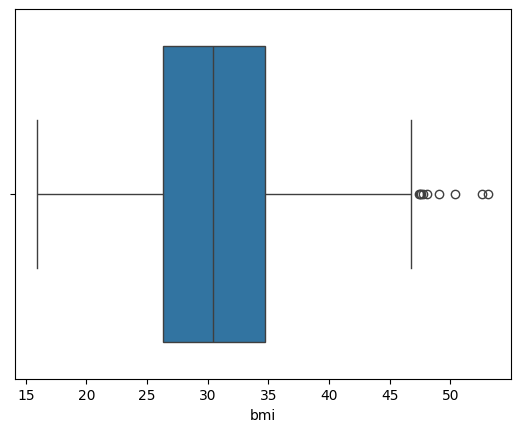

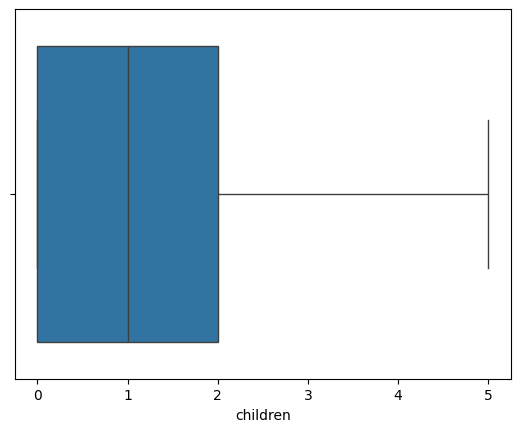

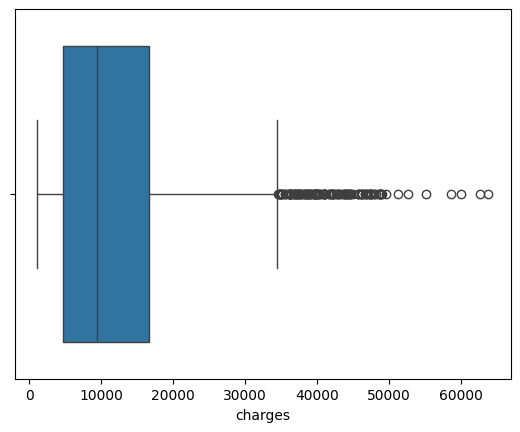

In [12]:
for col in numeric_columns:
    plt.Figure(figsize=(6, 4))
    sns.boxplot(x = df[col])
    plt.show()

<Axes: >

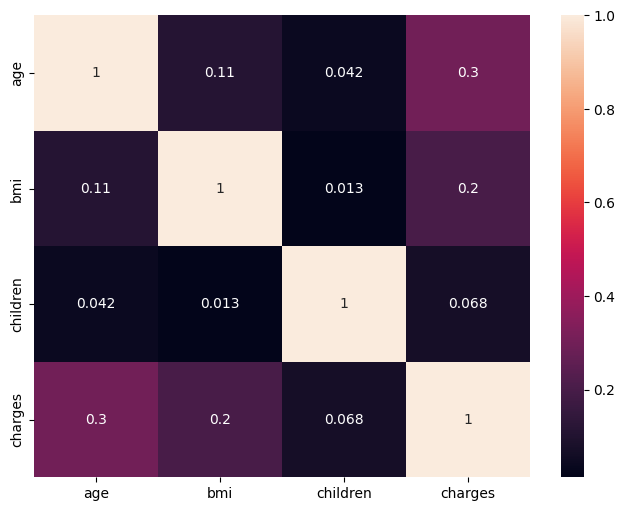

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Cleaning And Processing

In [14]:
data = df.copy()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.shape

(1337, 7)

In [18]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [19]:
for col in data.select_dtypes(include=['object']):
    print(f"value counts for {col}: ",df[col].value_counts())
    print()

value counts for sex:  sex
male      676
female    662
Name: count, dtype: int64

value counts for smoker:  smoker
no     1064
yes     274
Name: count, dtype: int64

value counts for region:  region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



In [20]:
data['sex'] = data['sex'].map({
    'male':0,
    'female':1
})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [21]:
data['smoker'] = data['smoker'].map({
    'no':0,
    'yes':1
})
data.shape

(1337, 7)

In [22]:
for col in ['sex', 'smoker']:
    print(f"value counts for {col}: ",data[col].value_counts())
    print()

value counts for sex:  sex
0    675
1    662
Name: count, dtype: int64

value counts for smoker:  smoker
0    1063
1     274
Name: count, dtype: int64



In [23]:
data.rename(columns={
    'sex':'is_female',
    'smoker':'is_somker'
}, inplace=True)
data.head()

,age,is_female,bmi,children,is_somker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [24]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Step 2: Fit and transform
encoded = oe.fit_transform(data[['region']])

# Step 3: Convert encoded array to DataFrame
encoded_df = pd.DataFrame(
    encoded,
    columns=oe.get_feature_names_out(['region'])
)

# Step 4: Show encoded DataFrame
encoded_df.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [25]:
encoded_data = pd.concat([data, encoded_df], axis=1)

In [26]:
encoded_data.head()

,age,is_female,bmi,children,is_somker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,1.0,27.900,0.0,1.0,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18.0,0.0,33.770,1.0,0.0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28.0,0.0,33.000,3.0,0.0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33.0,0.0,22.705,0.0,0.0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32.0,0.0,28.880,0.0,0.0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [27]:
encoded_data.drop(columns=['region'], inplace=True)

In [28]:
encoded_data

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,1.0,27.900,0.0,1.0,16884.92400,0.0,0.0,0.0,1.0
1,18.0,0.0,33.770,1.0,0.0,1725.55230,0.0,0.0,1.0,0.0
2,28.0,0.0,33.000,3.0,0.0,4449.46200,0.0,0.0,1.0,0.0
3,33.0,0.0,22.705,0.0,0.0,21984.47061,0.0,1.0,0.0,0.0
4,32.0,0.0,28.880,0.0,0.0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1334,18.0,1.0,31.920,0.0,0.0,2205.98080,0.0,0.0,1.0,0.0
1335,18.0,1.0,36.850,0.0,0.0,1629.83350,0.0,0.0,0.0,1.0
1336,21.0,1.0,25.800,0.0,0.0,2007.94500,0.0,1.0,0.0,0.0
1337,61.0,1.0,29.070,0.0,1.0,29141.36030,NaN,NaN,NaN,NaN


In [29]:
encoded_data.shape


(1338, 10)

In [30]:
encoded_data.dropna(inplace=True)

In [31]:
encoded_data.shape

(1336, 10)

In [32]:
encoded_data

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,1.0,27.900,0.0,1.0,16884.92400,0.0,0.0,0.0,1.0
1,18.0,0.0,33.770,1.0,0.0,1725.55230,0.0,0.0,1.0,0.0
2,28.0,0.0,33.000,3.0,0.0,4449.46200,0.0,0.0,1.0,0.0
3,33.0,0.0,22.705,0.0,0.0,21984.47061,0.0,1.0,0.0,0.0
4,32.0,0.0,28.880,0.0,0.0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1332,52.0,1.0,44.700,3.0,0.0,11411.68500,0.0,1.0,0.0,0.0
1333,50.0,0.0,30.970,3.0,0.0,10600.54830,1.0,0.0,0.0,0.0
1334,18.0,1.0,31.920,0.0,0.0,2205.98080,0.0,0.0,1.0,0.0
1335,18.0,1.0,36.850,0.0,0.0,1629.83350,0.0,0.0,0.0,1.0


# Feature Engineering and Extractions

<Axes: xlabel='bmi', ylabel='Count'>

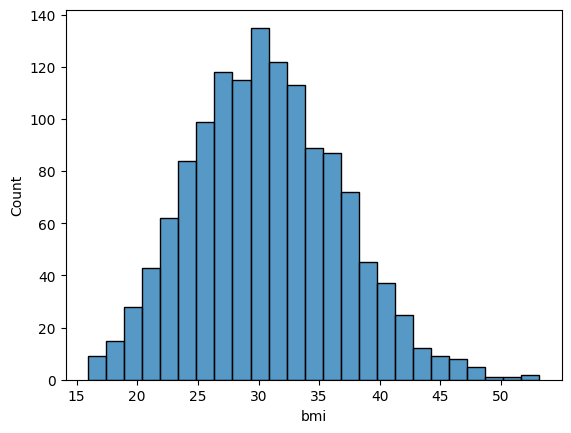

In [33]:
sns.histplot(encoded_data['bmi'])

In [34]:
encoded_data['bmi_category'] = pd.cut(
    encoded_data['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['UnderWeight', 'NormalWeight', 'Overweight', 'Obesity']
)

In [35]:
encoded_data.head()

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19.0,1.0,27.900,0.0,1.0,16884.92400,0.0,0.0,0.0,1.0,Overweight
1,18.0,0.0,33.770,1.0,0.0,1725.55230,0.0,0.0,1.0,0.0,Obesity
2,28.0,0.0,33.000,3.0,0.0,4449.46200,0.0,0.0,1.0,0.0,Obesity
3,33.0,0.0,22.705,0.0,0.0,21984.47061,0.0,1.0,0.0,0.0,NormalWeight
4,32.0,0.0,28.880,0.0,0.0,3866.85520,0.0,1.0,0.0,0.0,Overweight


<Axes: xlabel='bmi_category', ylabel='count'>

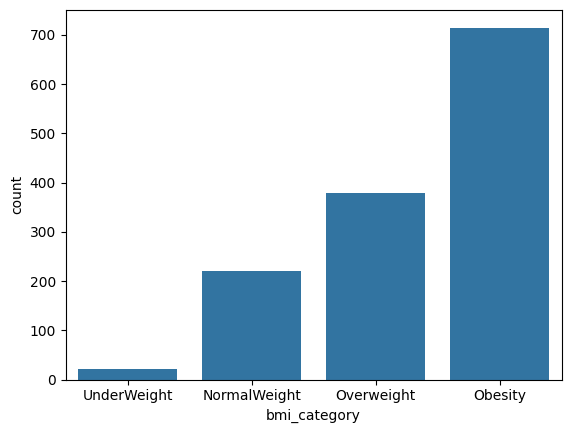

In [36]:
sns.countplot(x = encoded_data['bmi_category'])

In [37]:
df2 = oe.fit_transform(encoded_data[['bmi_category']])

encoded_df1 = pd.DataFrame(
    df2,
    columns=oe.get_feature_names_out(['bmi_category'])
)

final_df = pd.concat([encoded_data, encoded_df1], axis=1)
final_df

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category,bmi_category_NormalWeight,bmi_category_Obesity,bmi_category_Overweight,bmi_category_UnderWeight
0,19.0,1.0,27.900,0.0,1.0,16884.92400,0.0,0.0,0.0,1.0,Overweight,0.0,0.0,1.0,0.0
1,18.0,0.0,33.770,1.0,0.0,1725.55230,0.0,0.0,1.0,0.0,Obesity,0.0,1.0,0.0,0.0
2,28.0,0.0,33.000,3.0,0.0,4449.46200,0.0,0.0,1.0,0.0,Obesity,0.0,1.0,0.0,0.0
3,33.0,0.0,22.705,0.0,0.0,21984.47061,0.0,1.0,0.0,0.0,NormalWeight,1.0,0.0,0.0,0.0
4,32.0,0.0,28.880,0.0,0.0,3866.85520,0.0,1.0,0.0,0.0,Overweight,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,0.0,30.970,3.0,0.0,10600.54830,1.0,0.0,0.0,0.0,Obesity,0.0,1.0,0.0,0.0
1334,18.0,1.0,31.920,0.0,0.0,2205.98080,0.0,0.0,1.0,0.0,Obesity,0.0,1.0,0.0,0.0
1335,18.0,1.0,36.850,0.0,0.0,1629.83350,0.0,0.0,0.0,1.0,Obesity,0.0,0.0,1.0,0.0
1336,21.0,1.0,25.800,0.0,0.0,2007.94500,0.0,1.0,0.0,0.0,Overweight,NaN,NaN,NaN,NaN


In [38]:
final_df.rename(columns={
    'bmi_category_NormalWeight': 'NormalWeight',
    'bmi_category_Obesity' : 'Obesity',
    'bmi_category_Overweight':'Overweight',
    'bmi_category_UnderWeight': 'UnderWeight'
    
}, inplace=True)
final_df.dropna(inplace=True)
final_df.drop(columns=['bmi_category'], inplace=True)
final_df.shape

(1335, 14)

In [39]:
final_df = final_df.astype('int')
final_df

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest,NormalWeight,Obesity,Overweight,UnderWeight
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,1,0,0
2,28,0,33,3,0,4449,0,0,1,0,0,1,0,0
3,33,0,22,0,0,21984,0,1,0,0,1,0,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,23,1,33,0,0,10795,0,0,0,1,0,1,0,0
1332,52,1,44,3,0,11411,0,1,0,0,0,1,0,0
1333,50,0,30,3,0,10600,1,0,0,0,0,1,0,0
1334,18,1,31,0,0,2205,0,0,1,0,0,1,0,0


In [40]:
final_df.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_somker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'NormalWeight', 'Obesity', 'Overweight',
       'UnderWeight'],
      dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler

cols = ['age', 'bmi', 'children']

scaler = StandardScaler()

final_df[cols] = scaler.fit_transform(final_df[cols])
final_df.head()

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest,NormalWeight,Obesity,Overweight,UnderWeight
0,-1.441357,1,-0.518483,-0.910479,1,16884,0,0,0,1,0,0,1,0
1,-1.512643,0,0.461472,-0.080793,0,1725,0,0,1,0,0,1,0,0
2,-0.799787,0,0.461472,1.578578,0,4449,0,0,1,0,0,1,0,0
3,-0.443359,0,-1.335111,-0.910479,0,21984,0,1,0,0,1,0,0,0
4,-0.514645,0,-0.355157,-0.910479,0,3866,0,1,0,0,0,0,1,0


In [42]:
from scipy.stats import pearsonr


results = []

# Loop through all columns except 'charges'
for col in final_df.columns:
    if col != 'charges' and final_df[col].dtype in ['float64', 'int64']:
        # Compute Pearson correlation and p-value
        r, p = pearsonr(final_df[col], final_df['charges'])
        results.append({'feature': col, 'r': r, 'p_value': p})

# Create DataFrame of results
corr_df = pd.DataFrame(results).sort_values(by='r', ascending=False)

corr_df


,feature,r,p_value
4,is_somker,0.786928,8.616445e-282
0,age,0.296625,1.602539e-28
2,bmi,0.196080,4.906278e-13
3,children,0.067756,1.328002e-02
6,region_northwest,0.037286,1.733421e-01
10,Obesity,0.034522,2.074699e-01
5,region_northeast,0.016469,5.476922e-01
9,NormalWeight,-0.016324,5.512173e-01
11,Overweight,-0.018350,5.029273e-01
7,region_southeast,-0.021231,4.382947e-01


In [43]:
final_df['charges_cat'] = pd.qcut(
    final_df['charges'], 
    q=4,
    labels=False
)
final_df
7

7

In [44]:
cat_feature = [
    'is_somker', 'is_female',
    'region_northwest', 'region_northeast', 'region_southeast', 'region_southwest',
    'Obesity', 'NormalWeight', 'Overweight', 'UnderWeight', 
]
cat_feature

['is_somker',
 'is_female',
 'region_northwest',
 'region_northeast',
 'region_southeast',
 'region_southwest',
 'Obesity',
 'NormalWeight',
 'Overweight',
 'UnderWeight']

In [45]:

from scipy.stats import chi2_contingency

alpha = 0.05  
chi2_result = {}


for col in cat_feature:   # cat_feature should be a list of categorical column names
    contingency = pd.crosstab(final_df[col], final_df['charges_cat'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    
    decision = "Reject Null (Keep Feature)" if p_val < alpha else "Accept Null (Drop Feature)"
    
    chi2_result[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'decision': decision
    }


columns_to_to_drop = [
    feature for feature, result in chi2_result.items()
    if result.get('decision') == 'Accept Null (Drop Feature)'
]

print(columns_to_to_drop)
final_data = final_df.drop(columns=columns_to_to_drop)

final_data


['region_northwest', 'region_northeast', 'region_southeast', 'region_southwest', 'Obesity', 'NormalWeight', 'UnderWeight']


,age,is_female,bmi,children,is_somker,charges,Overweight,charges_cat
0,-1.441357,1,-0.518483,-0.910479,1,16884,1,3
1,-1.512643,0,0.461472,-0.080793,0,1725,0,0
2,-0.799787,0,0.461472,1.578578,0,4449,0,0
3,-0.443359,0,-1.335111,-0.910479,0,21984,0,3
4,-0.514645,0,-0.355157,-0.910479,0,3866,1,0
...,...,...,...,...,...,...,...,...
1331,-1.156215,1,0.461472,-0.910479,0,10795,0,2
1332,0.911067,1,2.258054,1.578578,0,11411,0,2
1333,0.768496,0,-0.028506,1.578578,0,10600,0,2
1334,-1.512643,1,0.134820,-0.910479,0,2205,0,0


In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [47]:
x = final_data.drop(columns=['charges'])
y = final_data['charges']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [49]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5


print("📊 Model Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Accuracy Score: 0.0
📊 Model Evaluation:
R² Score: 0.973
MAE: 874.37
RMSE: 2242.68


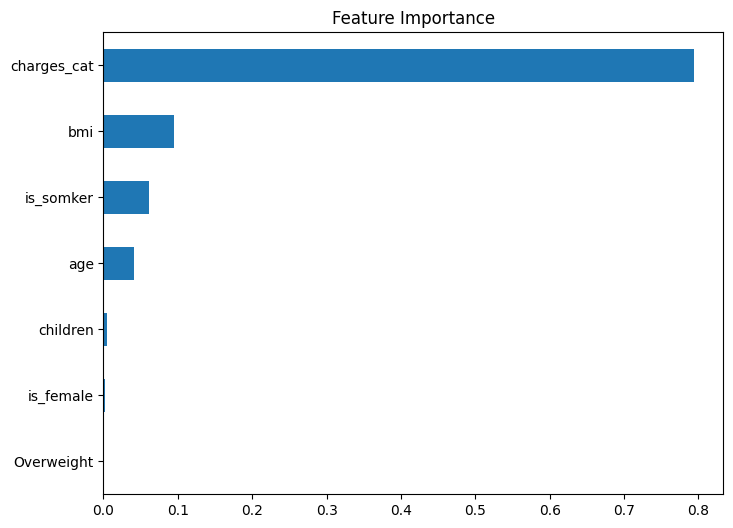

In [52]:
import matplotlib.pyplot as plt

importance = pd.Series(model.feature_importances_, index=x.columns)
importance.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance')
plt.show()
